## Variational Quantum Circuits (VQCs) for QDM ## 

0: ──RY(0.09)──RZ(0.67)─╭●──RY(0.88)──RZ(0.36)───────────╭●─────────RY(0.89)──RZ(0.42)──────────
1: ──RY(0.10)──RZ(0.15)─╰Z─╭●─────────RY(0.94)──RZ(0.10)─╰Z────────╭●─────────RY(0.36)──RZ(0.94)
2: ──RY(0.81)──RZ(0.91)────╰Z────────╭●─────────RY(0.39)──RZ(0.93)─╰Z────────╭●─────────RY(0.81)
3: ──RY(0.74)──RZ(0.50)──────────────╰Z─────────RY(0.11)──RZ(0.44)───────────╰Z─────────RY(0.85)

──╭●──────────────┤  <Z>
──╰Z────────╭●────┤  <Z>
───RZ(0.73)─╰Z─╭●─┤  <Z>
───RZ(0.27)────╰Z─┤  <Z>


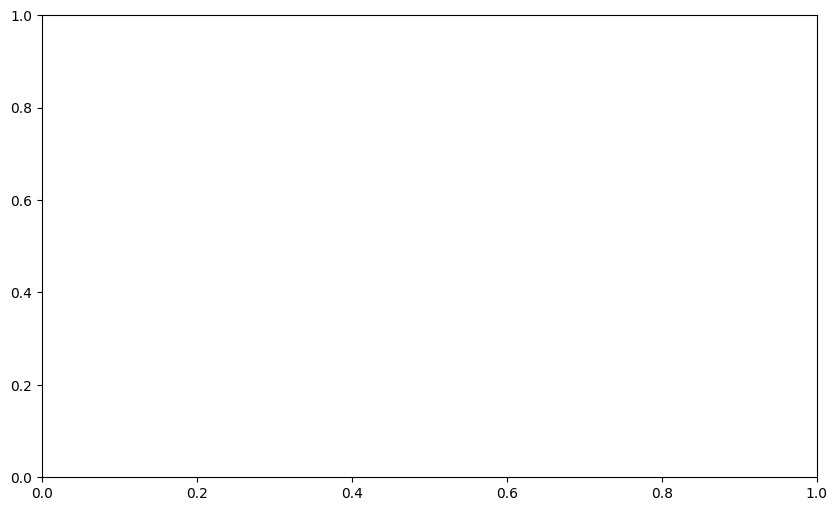

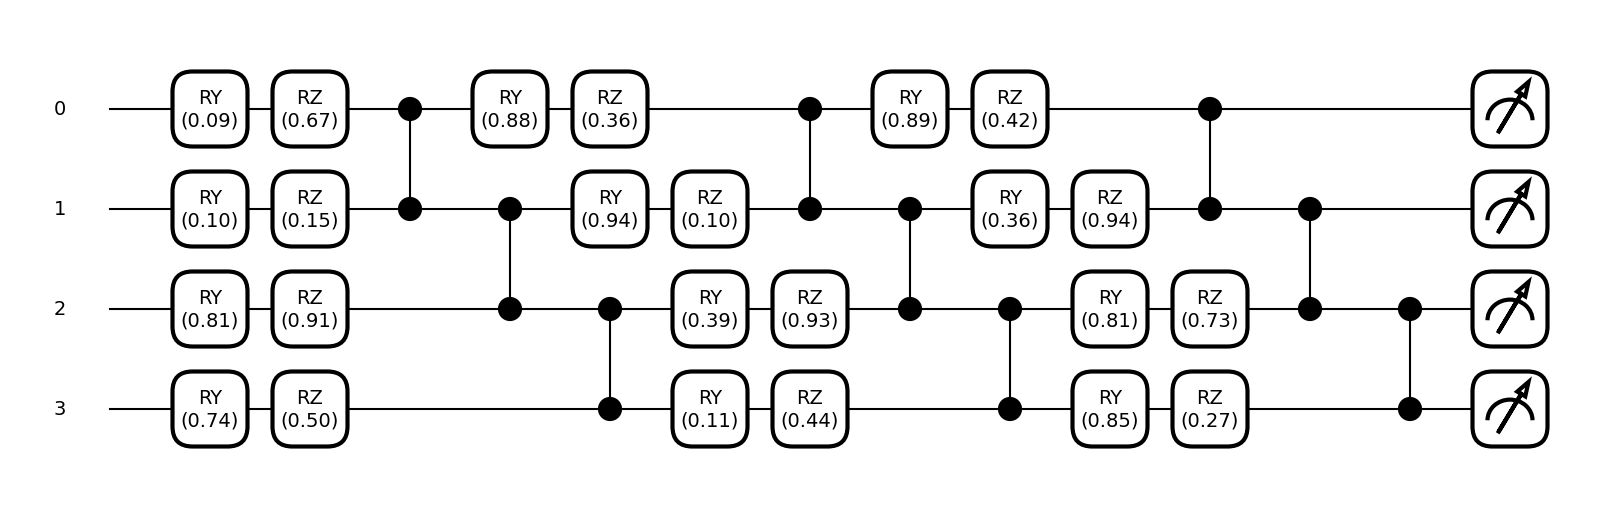

In [19]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

num_qubits = 4
depth = 3

dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def vqc(params):
    for d in range(depth):
        for q in range(num_qubits):
            qml.RY(params[d, q, 0], wires=q)
            qml.RZ(params[d, q, 1], wires=q)
        for q in range(num_qubits - 1):
            qml.CZ(wires=[q, q + 1])
    return [qml.expval(qml.PauliZ(q)) for q in range(num_qubits)]

params = np.random.random((depth, num_qubits, 2))

drawer = qml.draw(vqc)
print(drawer(params))

fig, ax = plt.subplots(figsize=(10, 6))
qml.draw_mpl(vqc, decimals=2)(params)
plt.show()


Measurement results: [tensor(-0.33592189, requires_grad=True), tensor(0.41503171, requires_grad=True), tensor(0.63270019, requires_grad=True), tensor(0.09110132, requires_grad=True), tensor(0.7909908, requires_grad=True)]
0: ──RX(0.10)──RY(0.80)──RZ(0.04)─╭●──RY(0.55)──RZ(0.81)───────────╭●─────────RY(0.94)──RZ(0.99)
1: ──RX(0.20)──RY(0.46)──RZ(0.35)─╰Z─╭●─────────RY(0.35)──RZ(0.54)─╰Z────────╭●─────────RY(0.59)
2: ──RX(0.30)──RY(0.52)──RZ(0.27)────╰Z────────╭●─────────RY(0.38)──RZ(0.03)─╰Z────────╭●───────
3: ──RX(0.40)──RY(0.78)──RZ(0.29)──────────────╰Z────────╭●─────────RY(0.48)──RZ(0.37)─╰Z───────
4: ──RY(0.14)──RZ(0.62)──────────────────────────────────╰Z─────────RY(0.38)──RZ(0.71)──────────

────────────╭●────────────────────────┤  <Z>
───RZ(0.45)─╰Z────────╭●──────────────┤  <Z>
───RY(0.05)──RZ(0.39)─╰Z────────╭●────┤  <Z>
──╭●─────────RY(0.28)──RZ(0.27)─╰Z─╭●─┤  <Z>
──╰Z─────────RY(0.37)──RZ(0.14)────╰Z─┤  <Z>


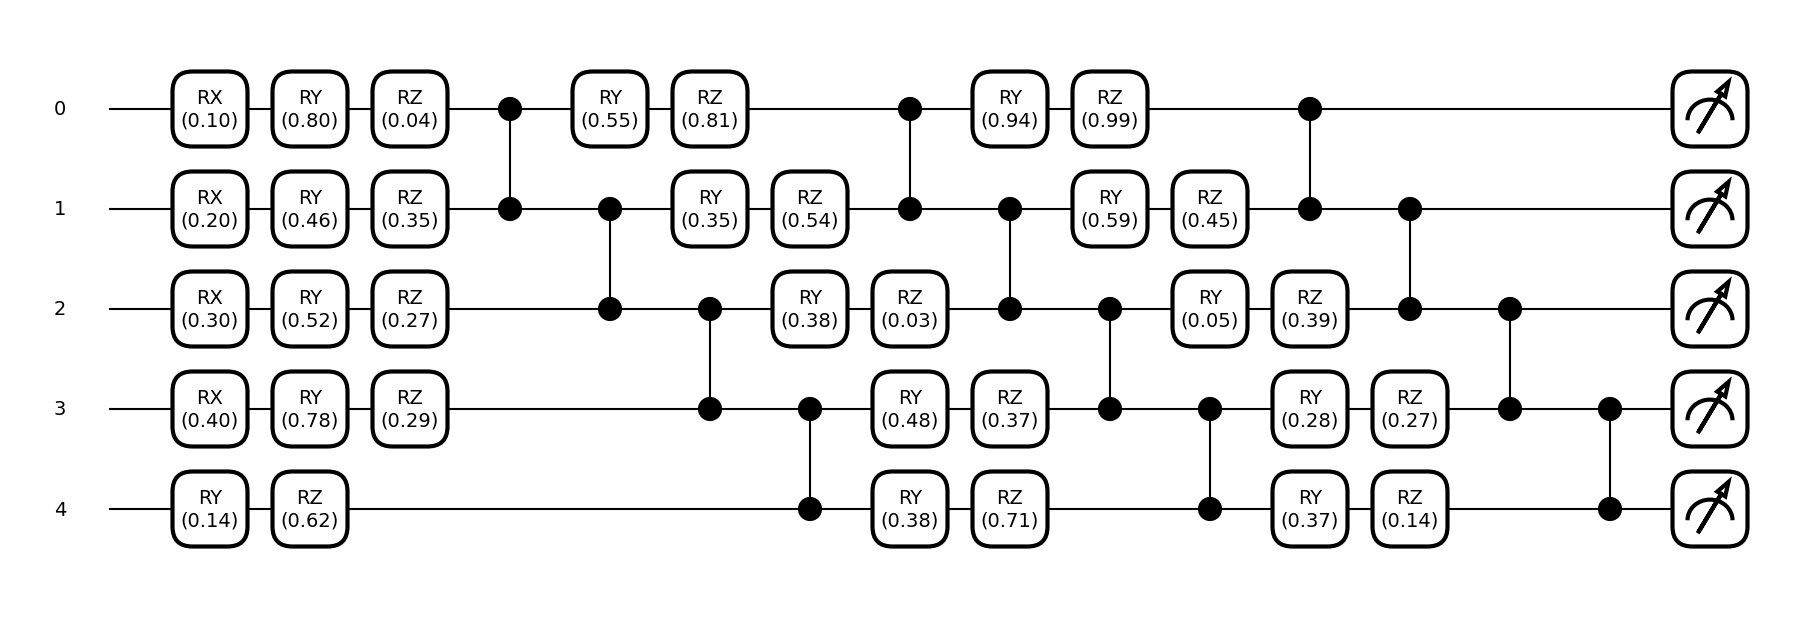

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

num_qubits = 5
depth = 3

dev = qml.device("default.qubit", wires=num_qubits)

classical_data = np.array([0.1, 0.2, 0.3, 0.4])

def encode_classical_data(data):
    for i in range(len(data)):
        qml.RX(data[i], wires=i)

@qml.qnode(dev)
def vqc(params, data):
    encode_classical_data(data)
    
    for d in range(depth):
        for q in range(num_qubits):
            qml.RY(params[d, q, 0], wires=q)
            qml.RZ(params[d, q, 1], wires=q)
        for q in range(num_qubits - 1):
            qml.CZ(wires=[q, q + 1])
    
    # Measurement to extract classical information
    return [qml.expval(qml.PauliZ(q)) for q in range(num_qubits)]

params = np.random.random((depth, num_qubits, 2))

results = vqc(params, classical_data)
print("Measurement results:", results)

drawer = qml.draw(vqc, expansion_strategy="device")
print(drawer(params, classical_data))

qml.draw_mpl(vqc, decimals=2)(params, classical_data)
plt.show()
